# 2.6 Probability

## 2.6.1. Basic Probability Theory


In [2]:
!pip install d2l==0.14.2

     |████████████████████████████████| 53 kB 1.2 MB/s 


In [3]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [4]:
fair_probs = torch.ones([6])/6
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [5]:
multinomial.Multinomial(1,fair_probs).sample()

tensor([0., 0., 1., 0., 0., 0.])

In [6]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([4., 0., 1., 2., 2., 1.])

In [7]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts/1000

tensor([0.1860, 0.1740, 0.1600, 0.1580, 0.1700, 0.1520])

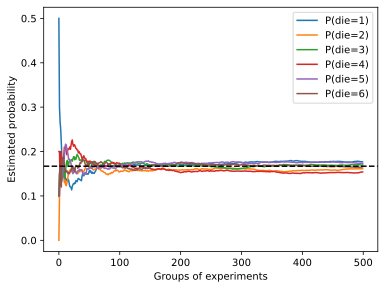

In [8]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();